## Learning with Prototypes (LwP) Classifier using Synthetic 2D Gaussian Data with Visualization

### Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### LwP

In [4]:
def learning_with_prototype(X_train, y_train, X_test):
    """
    Learning with Prototype (LwP) classifier.

    Parameters:
        X_train (ndarray): Training data features.
        y_train (ndarray): Training data labels.
        X_test (ndarray): Test data features.

    Returns:
        ndarray: Predicted labels for the test data.
    """
    unique_labels = np.unique(y_train)
    class_prototypes = [
        np.mean(X_train[y_train == label] , axis = 0) 
        for label in unique_labels
    ]

    predicted_labels = []
    for sample in X_test:
        distances = np.linalg.norm(sample - class_prototypes , axis = 1)
        closest_label_index = np.argmin(distances)
        predicted_labels.append(unique_labels[closest_label_index])

    return np.array(predicted_labels)

### Generating Synthetic Data

In [5]:
np.random.seed(0)
num_samples = 100

class_1_mean = np.array([1.0, 1.0])
class_2_mean = np.array([-2.0, -2.0])
class_1_cov = np.array([[0.8, 0.4], [0.4, 0.8]])
class_2_cov = np.array([[0.8, -0.6], [-0.6, 0.8]])

X_class_1 = np.random.multivariate_normal(class_1_mean, class_1_cov, num_samples)
X_class_2 = np.random.multivariate_normal(class_2_mean, class_2_cov, num_samples)

X_train = np.vstack((X_class_1, X_class_2))
y_train = np.hstack((np.zeros(num_samples), np.ones(num_samples)))

### Compute Class Prototypes

In [6]:
class_1_prototype = np.mean(X_class_1, axis=0)
class_2_prototype = np.mean(X_class_2, axis=0)

### Plotting

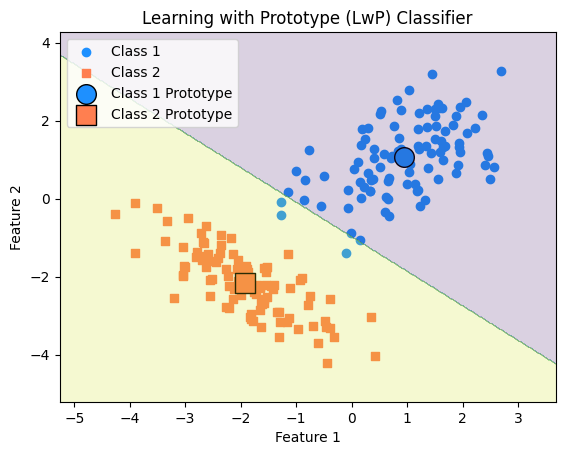

In [16]:
plt.scatter(X_class_1[: , 0] , X_class_1[: , 1], color = 'dodgerblue', marker = 'o', label = 'Class 1')
plt.scatter(X_class_2[: , 0] , X_class_2[: , 1] , color = 'coral' ,  marker = 's' , label = 'Class 2')

plt.scatter(class_1_prototype[0] , class_1_prototype[1] , color = 'dodgerblue' , marker='o' , s = 200 , label = 'Class 1 Prototype' , edgecolors = 'black')
plt.scatter(class_2_prototype[0] , class_2_prototype[1] , color = 'coral' , marker='s' , s = 200 , label = 'Class 2 Prototype' , edgecolors = 'black')

x_min , x_max = X_train[: , 0].min() - 1 , X_train[: , 0].max() + 1
y_min , y_max = X_train[: , 1].min() - 1 , X_train[: , 1].max() + 1

xx , yy = np.meshgrid(np.arange(x_min , x_max , 0.02),
                     np.arange(y_min , y_max , 0.02))
Z = learning_with_prototype(X_train , y_train , np.c_[xx.ravel() , yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx , yy , Z , alpha = 0.2)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Learning with Prototype (LwP) Classifier')
plt.legend()
plt.show()